In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("Airpassengers.csv")

In [4]:
df.head(10)
#df['Month']=pd.to_datetime(df['Month'])

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
5  1949-06          135
6  1949-07          148
7  1949-08          148
8  1949-09          136
9  1949-10          119

In [5]:
#To check datatypes 
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#change datatype of Month column from objetc to DateTime during the load of
#dataset 
df=pd.read_csv("Airpassengers.csv",parse_dates=['Month'])

In [7]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
df.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [9]:
#It is recommended that we make our time series reference as the index
#(input /independent variaable datetime type)
df=pd.read_csv("Airpassengers.csv",parse_dates=['Month'],index_col='Month')

In [10]:
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [12]:
df.tail()

#Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

In [11]:
#how many rows and columns
df.shape

(144, 1)

In [13]:
#To check null values
df.isnull().sum()

#Passengers    0
dtype: int64

In [15]:
#To extract data from given dataframe df 
#suppose we want to extrace data from 1st-april-1951  to 1-march-1952
#use slicing
df['1951-04-01':'1952-03-01'] #start index =1951-04-01
#stop index=1952-03-01  step=+1 (month wise increment)

#Passengers
Month                  
1951-04-01          163
1951-05-01          172
1951-06-01          178
1951-07-01          199
1951-08-01          199
1951-09-01          184
1951-10-01          162
1951-11-01          146
1951-12-01          166
1952-01-01          171
1952-02-01          180
1952-03-01          193

In [18]:
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [20]:
df.loc['1949-01-01'] #to extract no of passengers of particular date 

#Passengers    112
Name: 1949-01-01 00:00:00, dtype: int64

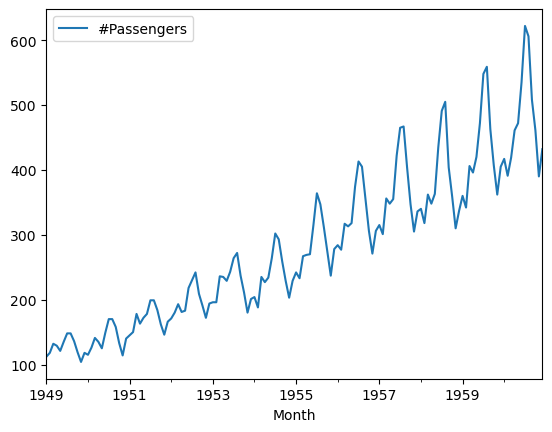

In [21]:
#visualise time series with the help of line plot
df.plot()
plt.show()

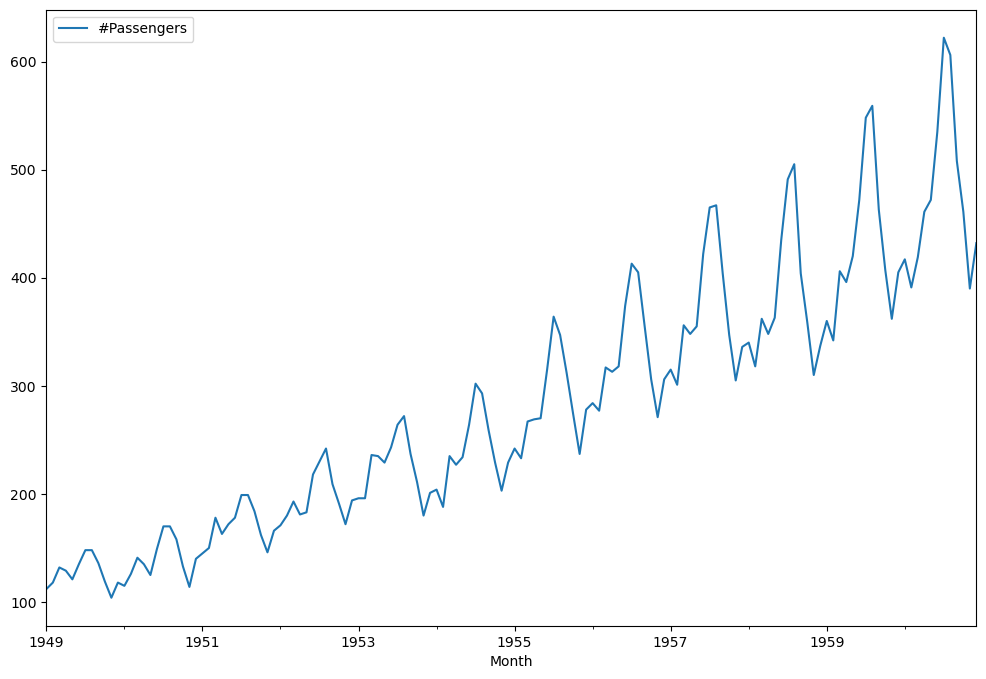

In [25]:
#increase the size of graph 
from pylab import rcParams 
rcParams['figure.figsize']=12,8  #width,height
df.plot()
plt.show()

In [26]:
#Decompose of time series data 
#clearly see in above graph , Seasonality is not constant 
#and Upword trend 
#use multiplicative model of decompose 
#inbuilt class seasonal_decompose  which define in outer class
#tsa.seasonal -->which define in inbuilt package statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose

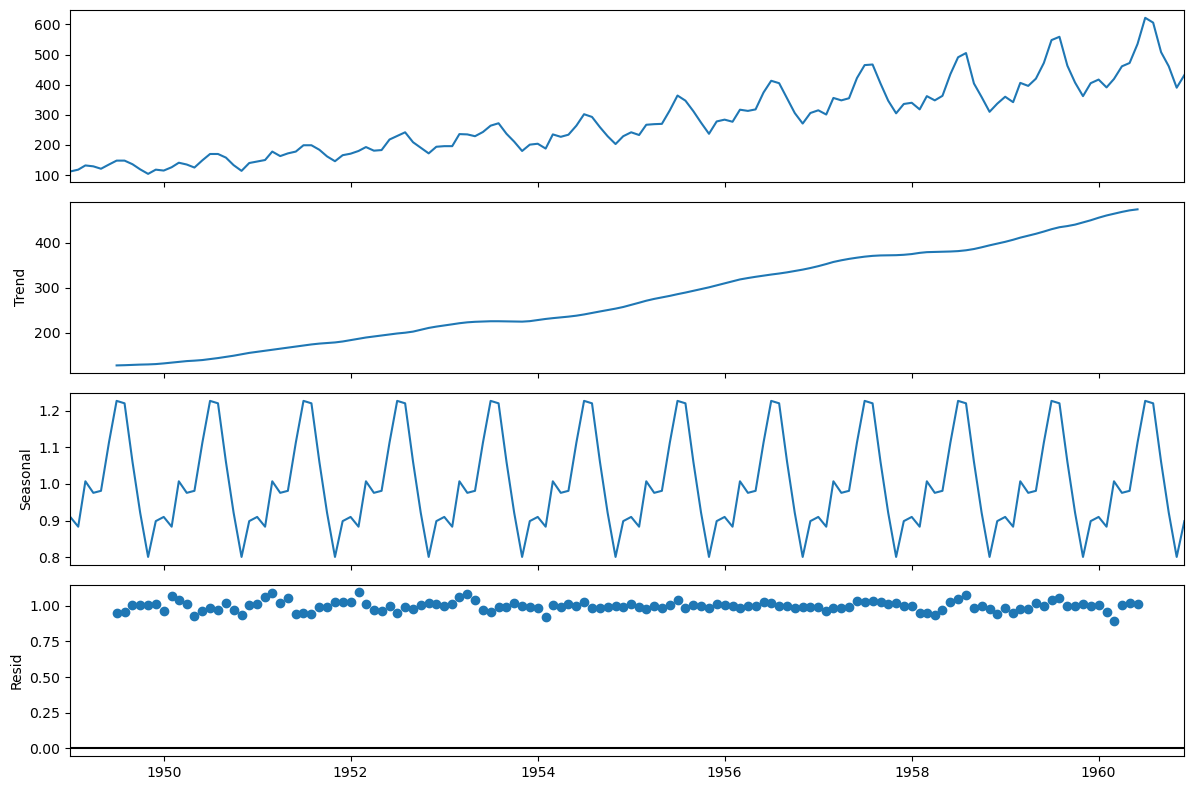

In [27]:
#create object of seasonal_decompose class
mul_decompose=seasonal_decompose(df,model='multiplicative')
#visualise the graph
#mul_decompose is use defined object of mul_decompose class
mul_decompose.plot()
plt.show()

In [ ]:
#In multiplicative model  : 
#output variable Y=T*S*E 
#T means trend   and   S means Seasonality   and E or I means residual Error

#In Additive model 
#output variable Y=T+S+E 

In [28]:
#first copy original dataset df into new dataset , se inbuilt method copy()
#df original dataset
df_new=df.copy()

In [29]:
df_new.dtypes

#Passengers    int64
dtype: object

In [30]:
df_new.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [31]:
#converts multiplicative model into additive 
#apply df_new 
df_new['#Passengers']=np.log(df_new)  #log(df_new['#Passengers'])
df_new.head()

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791

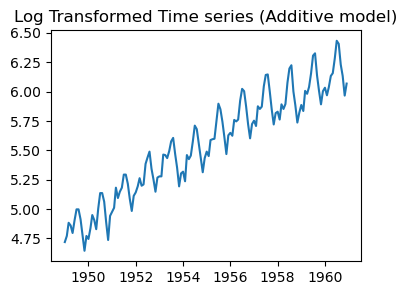

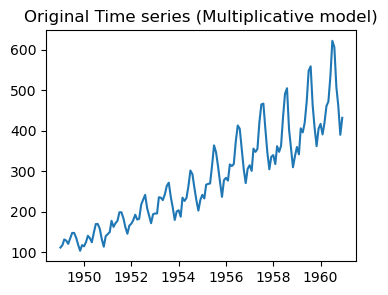

In [50]:
rcParams['figure.figsize']=4,3

plt.title('Log Transformed Time series (Additive model)')
plt.plot(df_new)
plt.show()

plt.title('Original Time series (Multiplicative model)')
plt.plot(df)
plt.show()